# Time Series

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime
now = datetime.now()
print(now)
now.year, now.month, now.day

2017-12-17 13:56:57.404008


(2017, 12, 17)

In [4]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(delta)
delta.days
delta.seconds

926 days, 15:45:00


56700

In [5]:
from datetime import timedelta
start = datetime(2011, 1, 7)
print(start + timedelta(12))
start - 2 * timedelta(12)

2011-01-19 00:00:00


datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime

In [6]:
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [7]:
value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

2011-01-03 00:00:00


[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [8]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [9]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [10]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [11]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [12]:
idx = pd.to_datetime(datestrs + [None])
print(idx)
idx[2]
pd.isnull(idx)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)


array([False, False,  True], dtype=bool)

## Time Series Basics

In [13]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [14]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [15]:
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [16]:
ts.index.dtype

dtype('<M8[ns]')

In [17]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [19]:
stamp = ts.index[2]
print(stamp)
ts[stamp]

2011-01-07 00:00:00


-0.51943871505673811

In [20]:
print(ts['1/10/2011'])
ts['20110110']

1.9657805725


1.9657805725027142

In [21]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
print(longer_ts)
longer_ts['2001']

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
2000-01-06   -1.296221
2000-01-07    0.274992
2000-01-08    0.228913
2000-01-09    1.352917
2000-01-10    0.886429
                ...   
2002-09-17   -0.139298
2002-09-18   -1.159926
2002-09-19    0.618965
2002-09-20    1.373890
2002-09-21   -0.983505
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64


2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
2001-01-06    0.106403
2001-01-07   -1.308228
2001-01-08    2.173185
2001-01-09    0.564561
2001-01-10   -0.190481
                ...   
2001-12-22    0.000369
2001-12-23    0.900885
2001-12-24   -0.454869
2001-12-25   -0.864547
2001-12-26    1.129120
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [22]:
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
2001-05-06    0.569497
2001-05-07    1.489410
2001-05-08    1.264250
2001-05-09   -0.761837
2001-05-10   -0.331617
                ...   
2001-05-22    0.503699
2001-05-23   -1.387874
2001-05-24    0.204851
2001-05-25    0.603705
2001-05-26    0.545680
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [23]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [24]:
print(ts)
ts['1/6/2011':'1/11/2011']

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64


2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

In [25]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [26]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])
print(long_df)
long_df.loc['5-2001']

            Colorado     Texas  New York      Ohio
2000-01-05  0.488675 -0.178098  2.122315  0.061192
2000-01-12  0.884111 -0.608506 -0.072052  0.544066
2000-01-19  0.323886 -1.683325  0.526860  1.858791
2000-01-26 -0.548419 -0.279397 -0.021299 -0.287990
2000-02-02  0.089175  0.522858  0.572796 -1.760372
2000-02-09  1.128179  1.568606 -0.342277 -0.009813
2000-02-16  0.053072 -0.041943 -1.694312 -0.362381
2000-02-23  1.127453  2.183830 -1.186623  0.334270
2000-03-01 -1.028389 -0.168496 -0.998948 -1.531151
2000-03-08 -1.079111 -1.097732  0.405148 -0.227228
...              ...       ...       ...       ...
2001-09-26 -0.511824 -1.387680  0.767902 -1.164490
2001-10-03  1.527070  0.287542  0.715359 -0.345805
2001-10-10  0.470886 -1.121515 -1.544365  1.720513
2001-10-17 -0.171724 -0.827840  0.370548 -0.674167
2001-10-24 -1.712340 -0.738151  0.391813  1.763403
2001-10-31 -0.054630 -0.656506 -1.550087 -0.044347
2001-11-07  0.681470 -0.953726 -1.857016  0.449495
2001-11-14 -0.061732  1.233914 

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


### Time Series with Duplicate Indices

In [27]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [28]:
dup_ts.index.is_unique

False

In [29]:
print(dup_ts['1/3/2000'])  # not duplicated
dup_ts['1/2/2000']  # duplicated

4


2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [30]:
grouped = dup_ts.groupby(level=0)
print(grouped.mean())
grouped.count()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32


2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting

In [32]:
print(ts)
resampler = ts.resample('D')
resampler

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64


DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating Date Ranges

In [3]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [4]:
print(pd.date_range(start='2012-04-01', periods=20))
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')


DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [5]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [6]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [7]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [8]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [9]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [10]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [11]:
Hour(2) + Minute(30)

<150 * Minutes>

In [12]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates

In [13]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [15]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
print(ts)
print(ts.shift(2))
ts.shift(-2)

2000-01-31    1.965781
2000-02-29    1.393406
2000-03-31    0.092908
2000-04-30    0.281746
Freq: M, dtype: float64
2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.965781
2000-04-30    1.393406
Freq: M, dtype: float64


2000-01-31    0.092908
2000-02-29    0.281746
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

ts / ts.shift(1) - 1

In [16]:
ts.shift(2, freq='M')

2000-03-31    1.965781
2000-04-30    1.393406
2000-05-31    0.092908
2000-06-30    0.281746
Freq: M, dtype: float64

In [17]:
print(ts.shift(3, freq='D'))
ts.shift(1, freq='90T')

2000-02-03    1.965781
2000-03-03    1.393406
2000-04-03    0.092908
2000-05-03    0.281746
dtype: float64


2000-01-31 01:30:00    1.965781
2000-02-29 01:30:00    1.393406
2000-03-31 01:30:00    0.092908
2000-04-30 01:30:00    0.281746
Freq: M, dtype: float64

#### Shifting dates with offsets

In [18]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
print(now)
now + 3 * Day()

2011-11-17 00:00:00


Timestamp('2011-11-20 00:00:00')

In [19]:
print(now + MonthEnd())
now + MonthEnd(2)

2011-11-30 00:00:00


Timestamp('2011-12-31 00:00:00')

In [20]:
offset = MonthEnd()
print(offset.rollforward(now))
offset.rollback(now)

2011-11-30 00:00:00


Timestamp('2011-10-31 00:00:00')

In [21]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
print(ts)
ts.groupby(offset.rollforward).mean()

2000-01-15    0.769023
2000-01-19    1.246435
2000-01-23    1.007189
2000-01-27   -1.296221
2000-01-31    0.274992
2000-02-04    0.228913
2000-02-08    1.352917
2000-02-12    0.886429
2000-02-16   -2.001637
2000-02-20   -0.371843
2000-02-24    1.669025
2000-02-28   -0.438570
2000-03-03   -0.539741
2000-03-07    0.476985
2000-03-11    3.248944
2000-03-15   -1.021228
2000-03-19   -0.577087
2000-03-23    0.124121
2000-03-27    0.302614
2000-03-31    0.523772
Freq: 4D, dtype: float64


2000-01-31    0.400283
2000-02-29    0.189319
2000-03-31    0.317297
dtype: float64

In [22]:
ts.resample('M').mean()

2000-01-31    0.400283
2000-02-29    0.189319
2000-03-31    0.317297
Freq: M, dtype: float64

## Time Zone Handling

In [23]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [24]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

### Time Zone Localization and Conversion

In [25]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00    0.000940
2012-03-10 09:30:00    1.343810
2012-03-11 09:30:00   -0.713544
2012-03-12 09:30:00   -0.831154
2012-03-13 09:30:00   -2.370232
2012-03-14 09:30:00   -1.860761
Freq: D, dtype: float64

In [28]:
print(ts.index)

DatetimeIndex(['2012-03-09 09:30:00', '2012-03-10 09:30:00',
               '2012-03-11 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')


In [27]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [30]:
print(ts)
ts_utc = ts.tz_localize('UTC')
print(ts_utc)
ts_utc.index

2012-03-09 09:30:00    0.000940
2012-03-10 09:30:00    1.343810
2012-03-11 09:30:00   -0.713544
2012-03-12 09:30:00   -0.831154
2012-03-13 09:30:00   -2.370232
2012-03-14 09:30:00   -1.860761
Freq: D, dtype: float64
2012-03-09 09:30:00+00:00    0.000940
2012-03-10 09:30:00+00:00    1.343810
2012-03-11 09:30:00+00:00   -0.713544
2012-03-12 09:30:00+00:00   -0.831154
2012-03-13 09:30:00+00:00   -2.370232
2012-03-14 09:30:00+00:00   -1.860761
Freq: D, dtype: float64


DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [31]:
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00    0.000940
2012-03-10 04:30:00-05:00    1.343810
2012-03-11 05:30:00-04:00   -0.713544
2012-03-12 05:30:00-04:00   -0.831154
2012-03-13 05:30:00-04:00   -2.370232
2012-03-14 05:30:00-04:00   -1.860761
Freq: D, dtype: float64

In [33]:
ts_eastern = ts.tz_localize('America/New_York')
print(ts_eastern)
print(ts_eastern.tz_convert('UTC'))
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 09:30:00-05:00    0.000940
2012-03-10 09:30:00-05:00    1.343810
2012-03-11 09:30:00-04:00   -0.713544
2012-03-12 09:30:00-04:00   -0.831154
2012-03-13 09:30:00-04:00   -2.370232
2012-03-14 09:30:00-04:00   -1.860761
Freq: D, dtype: float64
2012-03-09 14:30:00+00:00    0.000940
2012-03-10 14:30:00+00:00    1.343810
2012-03-11 13:30:00+00:00   -0.713544
2012-03-12 13:30:00+00:00   -0.831154
2012-03-13 13:30:00+00:00   -2.370232
2012-03-14 13:30:00+00:00   -1.860761
Freq: D, dtype: float64


2012-03-09 15:30:00+01:00    0.000940
2012-03-10 15:30:00+01:00    1.343810
2012-03-11 14:30:00+01:00   -0.713544
2012-03-12 14:30:00+01:00   -0.831154
2012-03-13 14:30:00+01:00   -2.370232
2012-03-14 14:30:00+01:00   -1.860761
Freq: D, dtype: float64

In [34]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with Time Zone−Aware Timestamp Objects

In [35]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [36]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [37]:
print(stamp_utc.value)
stamp_utc.tz_convert('America/New_York').value

1299902400000000000


1299902400000000000

In [38]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print(stamp)
stamp + Hour()

2012-03-12 01:30:00-04:00


Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [39]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
stamp + 2 * Hour()

2012-11-04 00:30:00-04:00


Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations Between Different Time Zones

In [44]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
print(ts.index)
ts1 = ts[:7].tz_localize('Europe/Paris')
print(ts1.index)
ts2 = ts1[2:].tz_convert('Europe/Moscow')
print(ts2.index)
result = ts1 + ts2
print(result.index)
result

2012-03-07 09:30:00    1.001543
2012-03-08 09:30:00   -0.503087
2012-03-09 09:30:00   -0.622274
2012-03-12 09:30:00   -0.921169
2012-03-13 09:30:00   -0.726213
2012-03-14 09:30:00    0.222896
2012-03-15 09:30:00    0.051316
2012-03-16 09:30:00   -1.157719
2012-03-19 09:30:00    0.816707
2012-03-20 09:30:00    0.433610
Freq: B, dtype: float64
DatetimeIndex(['2012-03-07 09:30:00', '2012-03-08 09:30:00',
               '2012-03-09 09:30:00', '2012-03-12 09:30:00',
               '2012-03-13 09:30:00', '2012-03-14 09:30:00',
               '2012-03-15 09:30:00', '2012-03-16 09:30:00',
               '2012-03-19 09:30:00', '2012-03-20 09:30:00'],
              dtype='datetime64[ns]', freq='B')
DatetimeIndex(['2012-03-07 09:30:00+01:00', '2012-03-08 09:30:00+01:00',
               '2012-03-09 09:30:00+01:00', '2012-03-12 09:30:00+01:00',
               '2012-03-13 09:30:00+01:00', '2012-03-14 09:30:00+01:00',
               '2012-03-15 09:30:00+01:00'],
              dtype='datetime64[ns, Eu

2012-03-07 08:30:00+00:00         NaN
2012-03-08 08:30:00+00:00         NaN
2012-03-09 08:30:00+00:00   -1.244548
2012-03-12 08:30:00+00:00   -1.842337
2012-03-13 08:30:00+00:00   -1.452427
2012-03-14 08:30:00+00:00    0.445791
2012-03-15 08:30:00+00:00    0.102632
Freq: B, dtype: float64

## Periods and Period Arithmetic

In [45]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [46]:
print(p + 5)
p - 2

2012


Period('2005', 'A-DEC')

In [47]:
pd.Period('2014', freq='A-DEC') - p

7

In [48]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [49]:
pd.Series(np.random.randn(6), index=rng)

2000-01    1.010737
2000-02    1.824875
2000-03   -0.997518
2000-04    0.850591
2000-05   -0.131578
2000-06    0.912414
Freq: M, dtype: float64

In [50]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

In [51]:
p = pd.Period('2007', freq='A-DEC')
print(p)
print(p.asfreq('M', how='start'))
p.asfreq('M', how='end')

2007
2007-01


Period('2007-12', 'M')

In [52]:
p = pd.Period('2007', freq='A-JUN')
print(p)
print(p.asfreq('M', 'start'))
p.asfreq('M', 'end')

2007
2006-07


Period('2007-06', 'M')

In [53]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [54]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ts.asfreq('M', how='start')

2006    0.188211
2007    2.169461
2008   -0.114928
2009    2.003697
Freq: A-DEC, dtype: float64


2006-01    0.188211
2007-01    2.169461
2008-01   -0.114928
2009-01    2.003697
Freq: M, dtype: float64

In [55]:
ts.asfreq('B', how='end')

2006-12-29    0.188211
2007-12-31    2.169461
2008-12-31   -0.114928
2009-12-31    2.003697
Freq: B, dtype: float64

### Quarterly Period Frequencies

In [56]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [57]:
print(p.asfreq('D', 'start'))
p.asfreq('D', 'end')

2011-11-01


Period('2012-01-31', 'D')

In [58]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
print(p4pm)
p4pm.to_timestamp()

2012-01-30 16:00


Timestamp('2012-01-30 16:00:00')

In [59]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
print(ts)
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32


2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### Converting Timestamps to Periods (and Back)

In [62]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
print(ts.index)
pts = ts.to_period()
pts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')


PeriodIndex(['2000-01', '2000-02', '2000-03'], dtype='period[M]', freq='M')

In [65]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
print(ts2)
ts2.to_period('M')

2000-01-29   -0.402827
2000-01-30    0.220487
2000-01-31   -0.193401
2000-02-01    0.669158
2000-02-02   -1.648985
2000-02-03   -2.252797
Freq: D, dtype: float64


2000-01   -0.402827
2000-01    0.220487
2000-01   -0.193401
2000-02    0.669158
2000-02   -1.648985
2000-02   -2.252797
Freq: M, dtype: float64

In [73]:
print(ts2.index)
pts = ts2.to_period()
print(pts.index)
ts3 = pts.to_timestamp(how='end')
ts3.index

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')
PeriodIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
             '2000-02-02', '2000-02-03'],
            dtype='period[D]', freq='D')


DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

### Creating a PeriodIndex from Arrays

In [74]:
data = pd.read_csv('examples/macrodata.csv')
print(data.head(5))
print(data.year)
data.quarter

     year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  
0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
6      1960.0
7      1960.0
8      1961.0
9      1961.0
        ...  
193    2007.0
194    2007.0
195    2007.0
196    2008.0
197    2008.0
1

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
6      3.0
7      4.0
8      1.0
9      2.0
      ... 
193    2.0
194    3.0
195    4.0
196    1.0
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [79]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                       freq='Q-DEC')
print(index)
data.index = index
data.index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')


PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

## Resampling and Frequency Conversion

In [84]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
print(ts.resample('M').mean().index)
ts.resample('M', kind='period').mean().index

2000-01-01   -2.949343
2000-01-02    0.634634
2000-01-03    0.124157
2000-01-04    1.297622
2000-01-05   -1.686933
2000-01-06    1.089539
2000-01-07    2.060882
2000-01-08   -0.241235
2000-01-09   -0.947872
2000-01-10    0.676294
                ...   
2000-03-31   -1.015634
2000-04-01   -0.411244
2000-04-02    1.465621
2000-04-03   -1.006219
2000-04-04   -0.902148
2000-04-05    0.752769
2000-04-06   -0.490509
2000-04-07   -0.524672
2000-04-08   -0.699196
2000-04-09    0.352361
Freq: D, Length: 100, dtype: float64
DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30'], dtype='datetime64[ns]', freq='M')


PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04'], dtype='period[M]', freq='M')

### Downsampling

In [85]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [90]:
print(ts.resample('5min').sum())
ts.resample('5min').sum().index

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32


DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:05:00',
               '2000-01-01 00:10:00'],
              dtype='datetime64[ns]', freq='5T')

In [87]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [89]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [91]:
ts.resample('5min', closed='right',
            label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

In [92]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### Upsampling and Interpolation

In [93]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2,
                                         freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.068103,-0.930342,0.845400,0.016472
2000-01-12,0.844963,1.850834,0.022074,-1.369179


In [94]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.068103,-0.930342,0.845400,0.016472
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.844963,1.850834,0.022074,-1.369179


In [95]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.068103,-0.930342,0.845400,0.016472
2000-01-06,0.068103,-0.930342,0.845400,0.016472
2000-01-07,0.068103,-0.930342,0.845400,0.016472
2000-01-08,0.068103,-0.930342,0.845400,0.016472
2000-01-09,0.068103,-0.930342,0.845400,0.016472
2000-01-10,0.068103,-0.930342,0.845400,0.016472
2000-01-11,0.068103,-0.930342,0.845400,0.016472
2000-01-12,0.844963,1.850834,0.022074,-1.369179


In [96]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.068103,-0.930342,0.845400,0.016472
2000-01-06,0.068103,-0.930342,0.845400,0.016472
2000-01-07,0.068103,-0.930342,0.845400,0.016472
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.844963,1.850834,0.022074,-1.369179


In [97]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.068103,-0.930342,0.845400,0.016472
2000-01-13,0.844963,1.850834,0.022074,-1.369179


### Resampling with Periods

In [107]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001',
                                           freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
print(frame[:5])
annual_frame = frame.resample('A-NOV').mean()
annual_frame

         Colorado     Texas  New York      Ohio
2000-01  0.895092  0.647293 -0.567879 -0.579517
2000-02 -0.751449  1.075519 -0.621142  1.878556
2000-03  1.260240  0.310051  0.106402  0.248013
2000-04 -1.393840 -0.669436 -0.566791 -0.381779
2000-05 -0.946547 -1.065103 -1.331826 -0.986453


,Colorado,Texas,New York,Ohio
2000,-0.063124,-0.067790,-0.128689,0.004177
2001,0.119151,-0.259263,0.272542,-0.404551
2002,0.061192,0.884111,-0.608506,-0.072052


In [108]:
# Q-DEC: Quarterly, year ending in December
print(annual_frame.resample('Q-DEC').ffill())
annual_frame.resample('Q-DEC', convention='end').bfill()

        Colorado     Texas  New York      Ohio
1999Q4 -0.063124 -0.067790 -0.128689  0.004177
2000Q1 -0.063124 -0.067790 -0.128689  0.004177
2000Q2 -0.063124 -0.067790 -0.128689  0.004177
2000Q3 -0.063124 -0.067790 -0.128689  0.004177
2000Q4  0.119151 -0.259263  0.272542 -0.404551
2001Q1  0.119151 -0.259263  0.272542 -0.404551
2001Q2  0.119151 -0.259263  0.272542 -0.404551
2001Q3  0.119151 -0.259263  0.272542 -0.404551
2001Q4  0.061192  0.884111 -0.608506 -0.072052
2002Q1  0.061192  0.884111 -0.608506 -0.072052
2002Q2  0.061192  0.884111 -0.608506 -0.072052
2002Q3  0.061192  0.884111 -0.608506 -0.072052
2002Q4  0.061192  0.884111 -0.608506 -0.072052


,Colorado,Texas,New York,Ohio
2000Q4,-0.063124,-0.067790,-0.128689,0.004177
2001Q1,0.119151,-0.259263,0.272542,-0.404551
2001Q2,0.119151,-0.259263,0.272542,-0.404551
2001Q3,0.119151,-0.259263,0.272542,-0.404551
2001Q4,0.119151,-0.259263,0.272542,-0.404551
2002Q1,0.061192,0.884111,-0.608506,-0.072052
2002Q2,0.061192,0.884111,-0.608506,-0.072052
2002Q3,0.061192,0.884111,-0.608506,-0.072052
2002Q4,0.061192,0.884111,-0.608506,-0.072052


In [110]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q3,-0.063124,-0.067790,-0.128689,0.004177
2000Q4,-0.063124,-0.067790,-0.128689,0.004177
2001Q1,-0.063124,-0.067790,-0.128689,0.004177
2001Q2,-0.063124,-0.067790,-0.128689,0.004177
2001Q3,0.119151,-0.259263,0.272542,-0.404551
2001Q4,0.119151,-0.259263,0.272542,-0.404551
2002Q1,0.119151,-0.259263,0.272542,-0.404551
2002Q2,0.119151,-0.259263,0.272542,-0.404551
2002Q3,0.061192,0.884111,-0.608506,-0.072052
2002Q4,0.061192,0.884111,-0.608506,-0.072052


## Moving Window Functions

In [111]:
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<IPython.core.display.Javascript object>


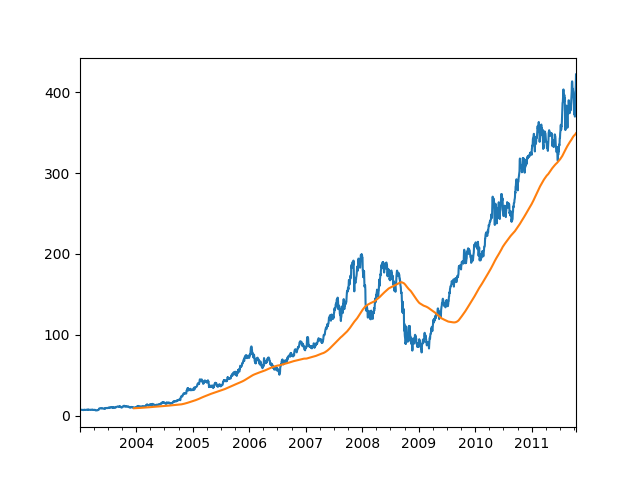

In [123]:
%matplotlib notebook
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

<IPython.core.display.Javascript object>


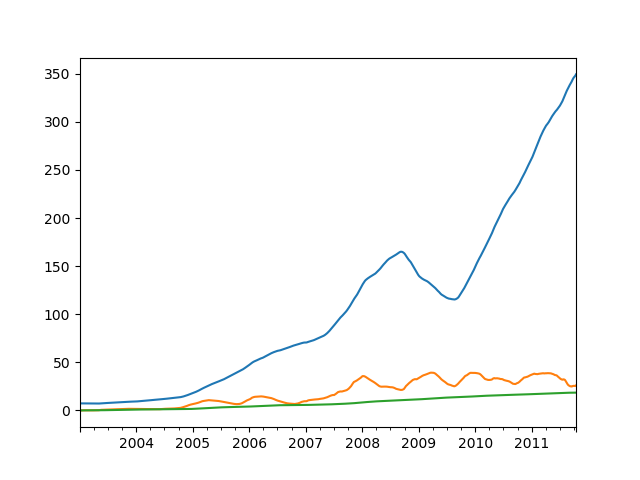

<IPython.core.display.Javascript object>


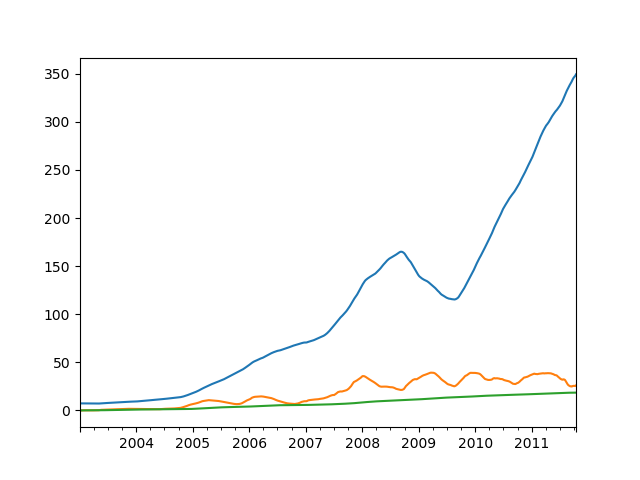

In [142]:
plt.figure()

In [143]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
print(appl_std250[5:12])
close_px.AAPL.rolling(250, min_periods=10).mean().plot()
appl_std250.plot()

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


In [144]:
expanding_mean = appl_std250.expanding().mean()
expanding_mean.plot()

<IPython.core.display.Javascript object>


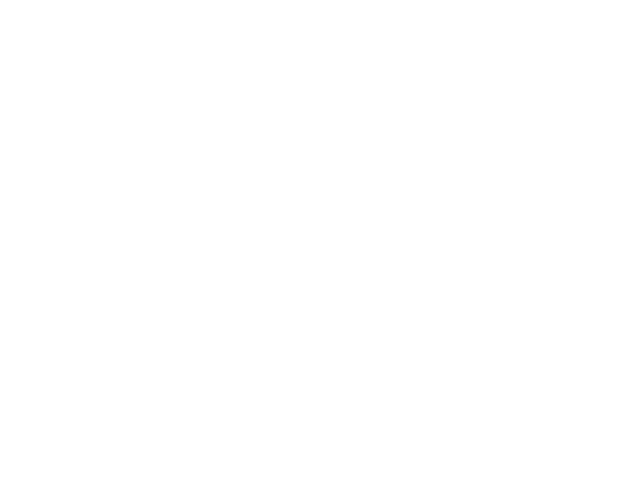

<IPython.core.display.Javascript object>


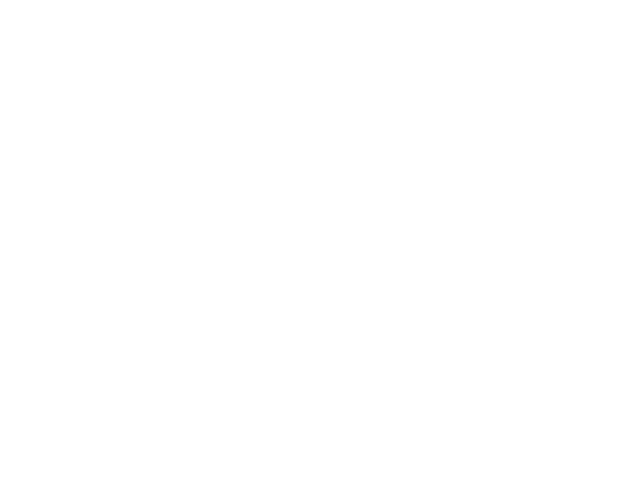

In [145]:
plt.figure()

<IPython.core.display.Javascript object>


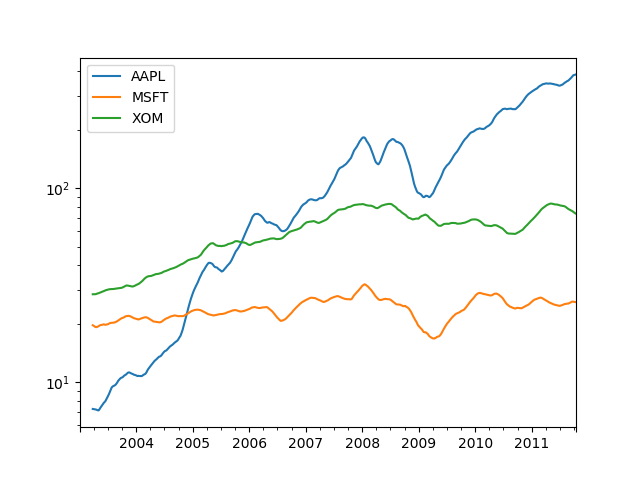

In [146]:
close_px.rolling(60).mean().plot(logy=True)

In [136]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


### Exponentially Weighted Functions

<IPython.core.display.Javascript object>


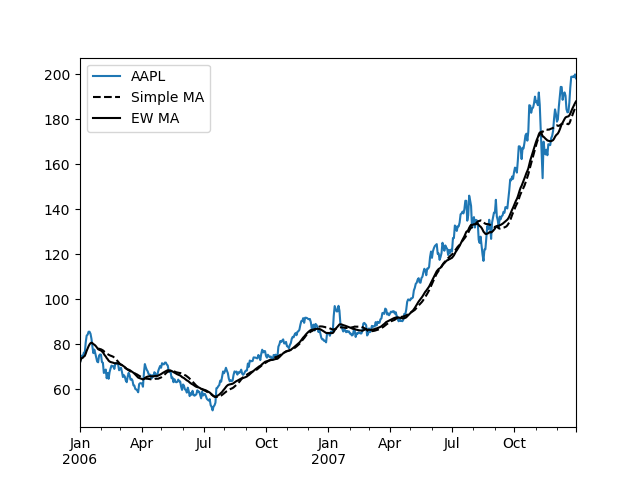

<IPython.core.display.Javascript object>


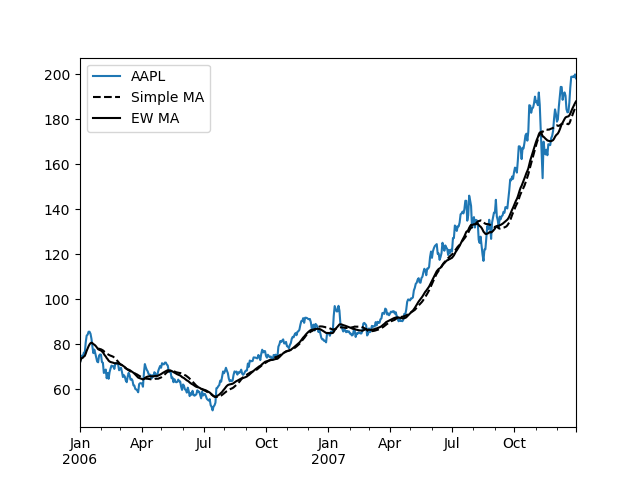

In [150]:
plt.figure()

In [151]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
aapl_px.plot()
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary Moving Window Functions

<IPython.core.display.Javascript object>


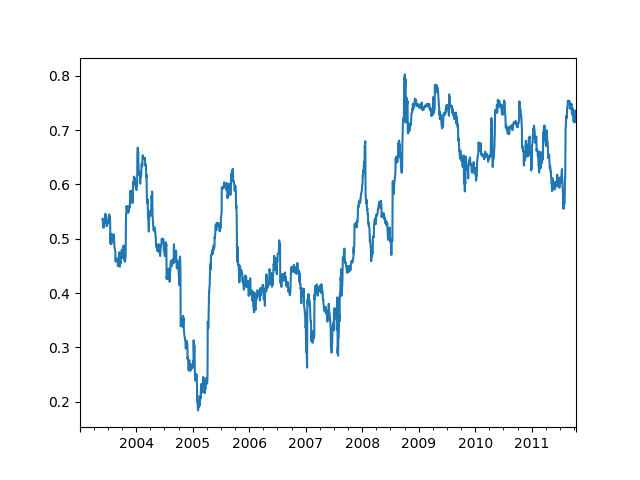

<IPython.core.display.Javascript object>


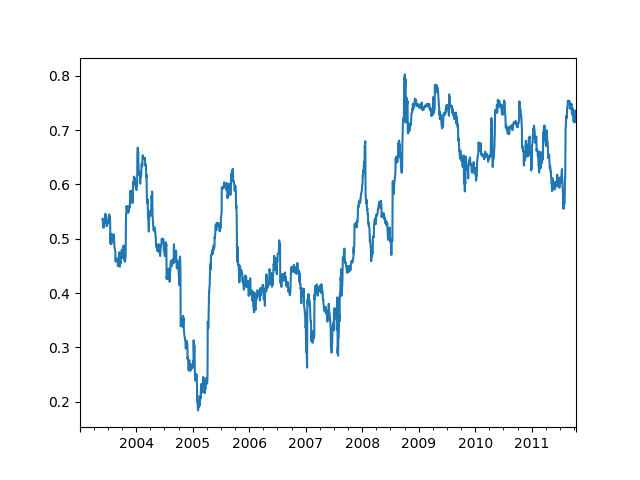

In [152]:
plt.figure()

In [153]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [154]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<IPython.core.display.Javascript object>


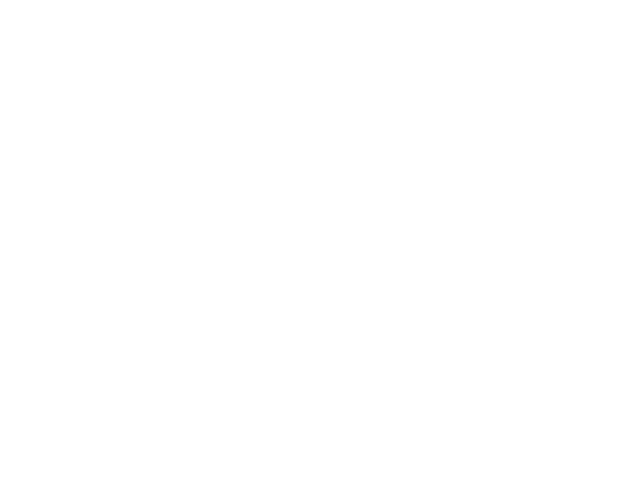

<IPython.core.display.Javascript object>


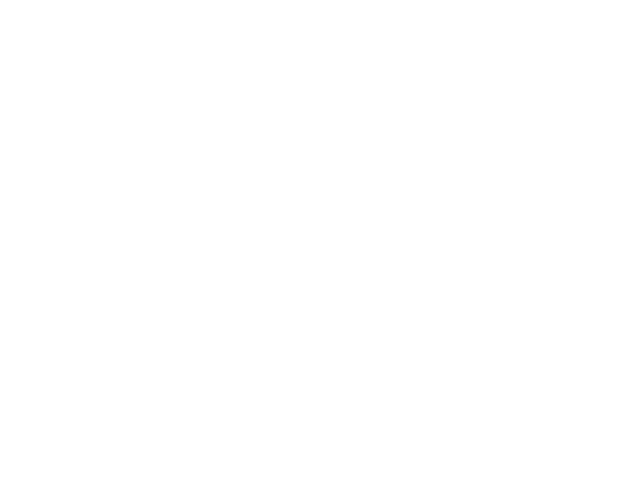

In [155]:
plt.figure()

<IPython.core.display.Javascript object>


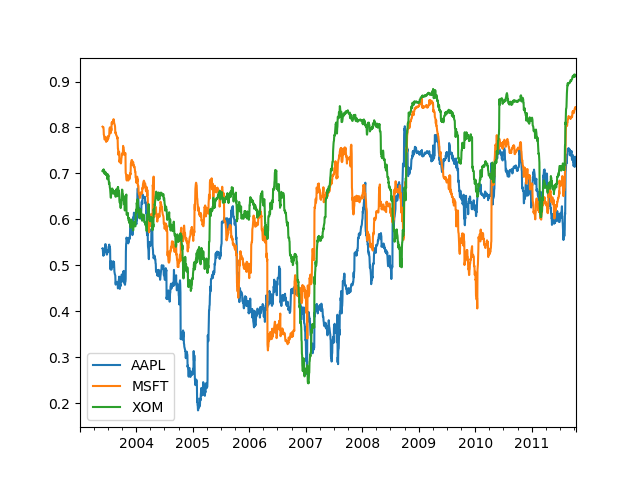

In [156]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-Defined Moving Window Functions

<IPython.core.display.Javascript object>


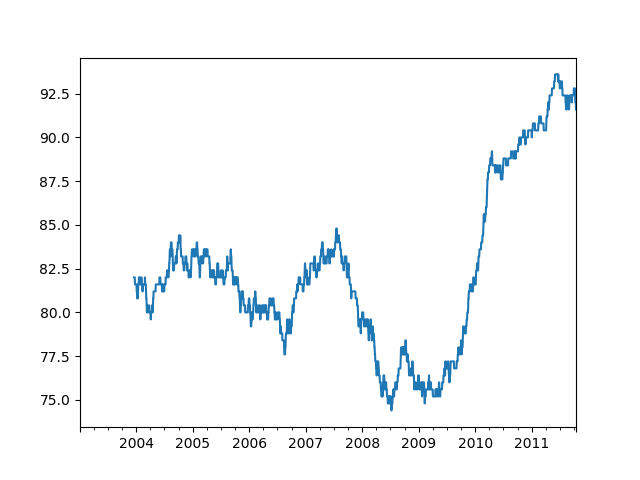

<IPython.core.display.Javascript object>


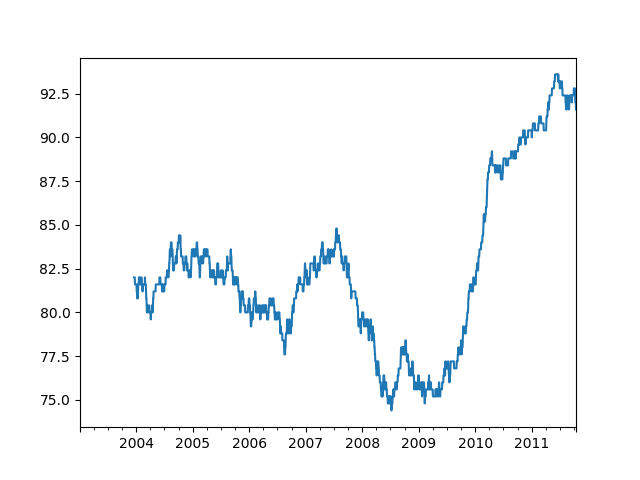

In [180]:
plt.figure()

In [182]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
#returns.AAPL.rolling(250).mean().plot()
#returns.AAPL.rolling(250).std().plot()
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

In [159]:
pd.options.display.max_rows = PREVIOUS_MAX_ROWS

## Conclusion